
El mini proyecto tiene los siguientes objetivos:

1. Mejorar tus conocimientos prácticos sobre el uso de KNN
2. Ampliar tus conocimientos sobre evalaución de modelos. Aprender a usar la evaluación cruzada (*Crossvalidation*)
3. Aumentar tus habilidades en la elección de un modelo de aprendizaje supervisado

**¡Buen Trabajo! Has avanzado bastante.**

**Nota: Antes de realizar el miniproyecto comunícate a alan@disruptora.org para recibir más orientación**

Hecho con ❤ por el Disrupteam_

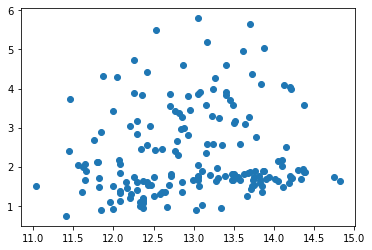

In [1]:
# 1._ Cargar los datos del DataSet de vinos
from sklearn.datasets import load_wine
WineDataset = load_wine() 

# 2._ Graficar para ver los datos originales
import matplotlib.pyplot as plt
X = WineDataset.data      # X contiene los atributos
plt.scatter(X[:,0],X[:,1])


In [2]:
# 3._ Separar los atributos de las etiquetas
X = WineDataset.data               # X --> atributos
y = WineDataset.target             # y --> etiquetas

# 4._ Normalizar los datos en un rango de (0-1).   --> Al usar KNN es preferible normalizar los datos 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

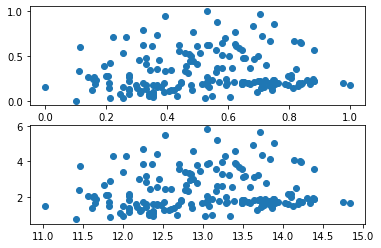

In [4]:
# Graficar para ver los datos originales vs los transformados
import matplotlib.pyplot as plt
X = scaler.transform(X)       # X contiene los atributos transformados

plt.subplot(211)
plt.scatter(X[:,0],X[:,1])

plt.subplot(212)
X = WineDataset.data          # X contiene los atributos
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=30)               # Considerando el parámetro de 30 vecinos (K=3)

# Dividir el conjunto de datos en entrenamiento y prueba, considerando que KNN no necesita entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [6]:
# Usando la métrica de Accuracy Score
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7962962962962963

Verificando el modelo con otras métricas:


In [7]:
# Usando la métrica de Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7936507936507936

In [8]:
# Usando la métrica de Precision Score
from sklearn.metrics import precision_score
y_pred = clf.predict(X_test)
precision_score(y_test, y_pred, average='micro')

0.7962962962962963

In [9]:
# Usando la métrica de Precision Score
from sklearn.metrics import recall_score
y_pred = clf.predict(X_test)
recall_score(y_test, y_pred, average='macro')

0.7936507936507936

# **Objetivo 2: Aprender a usar la evaluación cruzada (*Crossvalidation*)**


## **Ejercicios:**

***1. Investiga y describe lo que es la evaluación cruzada. Cuáles son las ventajas, desventajes y aplicaciones:***

La validación cruzada es una técnica que se usa en el aprendizaje automático para evaluar la variabilidad de un conjunto de datos y la confiabilidad de cualquier modelo entrenado con ellos. Uno de sus principales objetivos es detectar el sobreajuste, es decir, en los casos especificos en los que no se logre generalizar un patrón. De forma general realiza los siguientes pasos:

1._ El componente del modelo de validación cruzada toma como entrada un conjunto de datos con etiquetas, junto con un modelo de clasificación o regresión no entrenado.

2._ Divide el conjunto de datos en varios subconjuntos

3._ Crea un modelo en cada subconjunto y, a continuación, devuelve un conjunto de estadísticas de precisión para cada subconjunto. 

4._ Al comparar las estadísticas de precisión de todos los subconjuntos, se puede interpretar la calidad del conjunto de datos, generando asi la conclusión de si el modelo es susceptible a variaciones en los datos o no.

Dentro de las ventajas de usar esta técnica se encuentran: 

1._ La validación cruzada utiliza más datos de prueba.


2._ La validación cruzada evalúa el conjunto de datos y el modelo.



*************************************************************************************************************************************************************************************

***2. Haz evaluación cruzada con al menos tres tipos de métricas de evaluación:***

In [14]:
# Usando la métrica de Accuracy
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print(scores,"\n")

print("accuracy_score: ", accuracy_score(y_test, y_pred))
print("promedio validación cruzada", scores.mean(), " STD: ",scores.std())

[0.77777778 0.66666667 0.44444444 0.66666667 0.66666667 0.66666667
 0.77777778 0.55555556 0.55555556 0.77777778 0.44444444 1.
 0.77777778 0.44444444 0.77777778 0.66666667 0.77777778 0.66666667
 0.875      0.75      ] 

accuracy_score:  0.7407407407407407
promedio validación cruzada 0.6868055555555556  STD:  0.141467384344708


In [25]:
# Usando la métrica de f1_macro

from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X, y, cv=15, scoring='f1_macro')

print("Precisión de %0.2f, con una desviación estandar de %0.2f" % (scores.mean(), scores.std()))

from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=15, scoring='f1_macro')
scores

Precisión de 0.64, con una desviación estandar de 0.09


array([0.74603175, 0.75793651, 0.65555556, 0.83201058, 0.4962963 ,
       0.59259259, 0.63924964, 0.55555556, 0.74603175, 0.73677249,
       0.5       , 0.91534392, 0.66666667, 1.        , 0.67962963])

In [26]:
# Usando la métrica de Recall

from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X, y, cv=10, scoring='f1_weighted')

print("Precisión de %0.2f, con una desviación estandar de %0.2f" % (scores.mean(), scores.std()))

from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')
scores

Precisión de 0.70, con una desviación estandar de 0.07


array([0.73322973, 0.76897177, 0.64487179, 0.73675214, 0.62626263,
       0.64935065, 0.78518519, 0.68123543, 0.76470588, 0.81876751])